# Customer Churn Analysis
By: Ranto M T I Pardosi

## Latar Belakang

Sebuah perusahaan *online e-commerce* ingin mengetahui faktor-faktor yang paling memengaruhi churn pada pelanggan mereka, yakni kondisi dimana para pelanggan berhenti menggunakan layanan *e-commerce* mereka. Terdapat beberapa informasi yang dihimpun dari informasi pelanggan, seperti durasi berlangganan, jarak gudang barang ke pelanggan, status pernikahan, dan berbagai informasi lainnya. Target berupa *churn* memiliki keterangan sebagai berikut:

0: Tidak berhenti menggunakan layanan *e-commerce*

1: Berhenti menggunakan layanan *e-commerce*

Munculnya *churn* pada pelanggan merupakan indikasi buruk terhadap perkembangan bisnis perusahaan. Dengan berhentinya pelanggan mengakses layanan *e-commerce* milik perusahaan, maka makin besar pula kemungkinan turunnya transaksi yang terjadi dalam layanan *e-commerce* sehingga akan berdampak buruk terhadap pendapatan perusahaan. Untuk mengatasi hal ini, perusahaan perlu melakukan pendekatan pelanggan, seperti memberikan promo guna mengantisipasi *churn* pada pelanggan. Namun, perusahaan perlu mengidentifikasi pelanggan yang berpotensi *churn* dengan tepat untuk menghindari pemberian promo yang berlebihan dan kurang tepat sasaran, sehingga promo dialokasikan secara efektif dan tepat sasaran sehingga menghindari pula pemborosan *resources* perusahaan.

Berdasarkan permasalahan diatas, perusahaan perlu untuk mampu memprediksi pelanggan mana yang mungkin berhenti menggunakan layanan *e-commerce* perusahaan, sehingga perusahaan dapat memfokuskan sumber daya untuk memberikan stimulus seperti promo kepada para pelanggan tersebut. Selain itu, perusahaan juga ingin mengetahui faktor/variabel apa yang berpengaruh terhadap *churn* pelanggan agar perusahaan dapat melakukan perencanaan yang lebih tepat dalam mempertahankan pelanggan.

Oleh karena itu, *capstone project* ini akan berisikan analisis data untuk menemukan pola yang membedakan pelanggan yang bertahan dan pelanggan yang berhenti menggunakan layanan *e-commerce* perusahaan. Setelah itu, kita akan membangun model klasifikasi untuk memprediksi pelanggan yang mungkin akan *churn* atau tidak.

## Libraries

In [2]:
import pandas as pd
import numpy as np

# Data Viz
import matplotlib.pyplot as plt
import seaborn as sns
import missingno

# Imbalance Dataset
from imblearn.over_sampling import SMOTE


## Import Data

In [3]:
df = pd.read_csv('D:\PURWADHIKA JOB CONNECTOR DATA SCIENCE & MECHINE LEARNING (JCDSOL 013)\Capstone Project\Capstone Project - Modul 3\data_ecommerce_customer_churn.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


In [5]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [6]:
df.describe()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


## EDA

### Tenure x Churn

c:\Users\LEGION\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LEGION\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


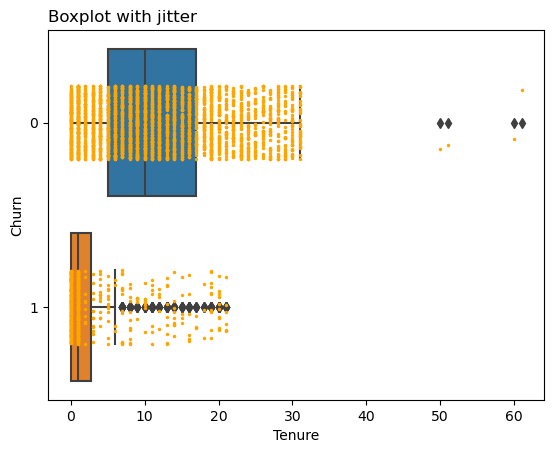

In [7]:
# boxplot
ax = sns.boxplot(y='Churn', x='Tenure', data=df, orient='h')
# add stripplot
ax = sns.stripplot(y='Churn', x='Tenure', data=df, color="orange", jitter=0.2, size=2.5, orient='h')

# add title
plt.title("Boxplot with jitter", loc="left")

# show the graph
plt.show()


user lebih cenderung churn adalah user dengan tenure < 10

### Marital Status x Churn

In [8]:
# Convert categorical variables to strings explicitly
df['MaritalStatus'] = df['MaritalStatus'].astype(str)
df['Churn'] = df['Churn'].astype(str)

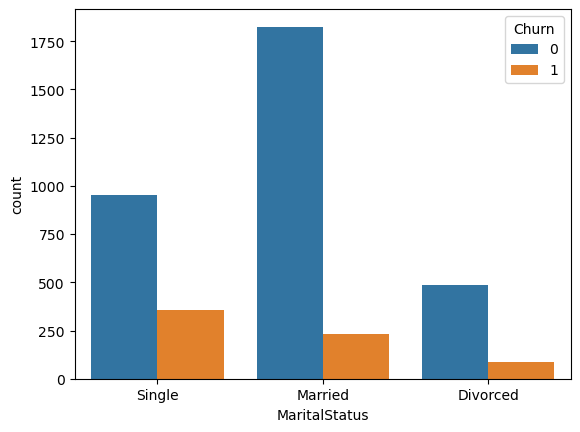

In [9]:
ax = sns.countplot(x="MaritalStatus", hue="Churn", data=df)

single paling banyak churn

### Cashback Amount x Churn

c:\Users\LEGION\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LEGION\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


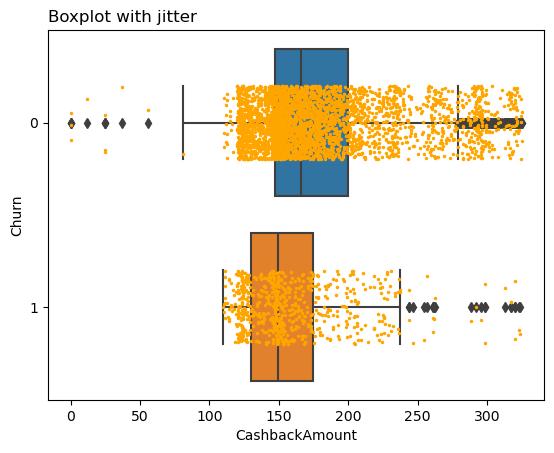

In [10]:
# boxplot
ax = sns.boxplot(y='Churn', x='CashbackAmount', data=df, orient='h')
# add stripplot
ax = sns.stripplot(y='Churn', x='CashbackAmount', data=df, color="orange", jitter=0.2, size=2.5, orient='h')

# add title
plt.title("Boxplot with jitter", loc="left")

# show the graph
plt.show()


Pelanggan dalam kategori churn memperoleh cashback dengan jumlah yang relatif lebih sedikit dibanding pelanggan non-churn.

### Complain x Churn

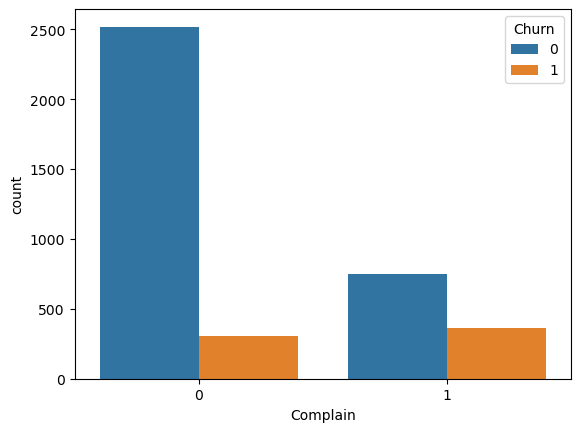

In [49]:
ax = sns.countplot(x="Complain", hue="Churn", data=df)

Pada pelanggan yang memiliki keluhan terkait aplikasi (complain=0), terlihat bahwa perbandingan pelanggan *churn* terhadap *non-churn* lebih tinggi dibandingkan dengan pelanggan yang tidak memiliki keluhan terhadap aplikasi.

## Data Cleaning

In [12]:
# Calculate the percentage of null values for each column
null_percentage = df.isnull().mean() * 100

# Sort the null percentages in descending order
null_percentage_sorted = null_percentage.sort_values(ascending=False)

# Display the sorted null percentages
print(null_percentage_sorted)

DaySinceLastOrder           5.404720
Tenure                      4.922608
WarehouseToHome             4.288252
NumberOfDeviceRegistered    0.000000
PreferedOrderCat            0.000000
SatisfactionScore           0.000000
MaritalStatus               0.000000
NumberOfAddress             0.000000
Complain                    0.000000
CashbackAmount              0.000000
Churn                       0.000000
dtype: float64


In [13]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(), round((df[col].isna().sum()/len(df[col])) * 100,2),
                    df[col].nunique(), list(df[col].drop_duplicates().values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'nullCount', 'nullPercentage', 'uniqueCount', 'uniqueSample'],
                     data=listItem)
dfDesc

,dataFeatures,dataType,nullCount,nullPercentage,uniqueCount,uniqueSample
0,Tenure,float64,194,4.92,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,float64,169,4.29,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,int64,0,0.00,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,object,0,0.00,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,int64,0,0.00,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,object,0,0.00,3,"[Single, Married, Divorced]"
6,NumberOfAddress,int64,0,0.00,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,int64,0,0.00,2,"[0, 1]"
8,DaySinceLastOrder,float64,213,5.40,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,float64,0,0.00,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


c:\Users\LEGION\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LEGION\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LEGION\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\LEGION\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before opera

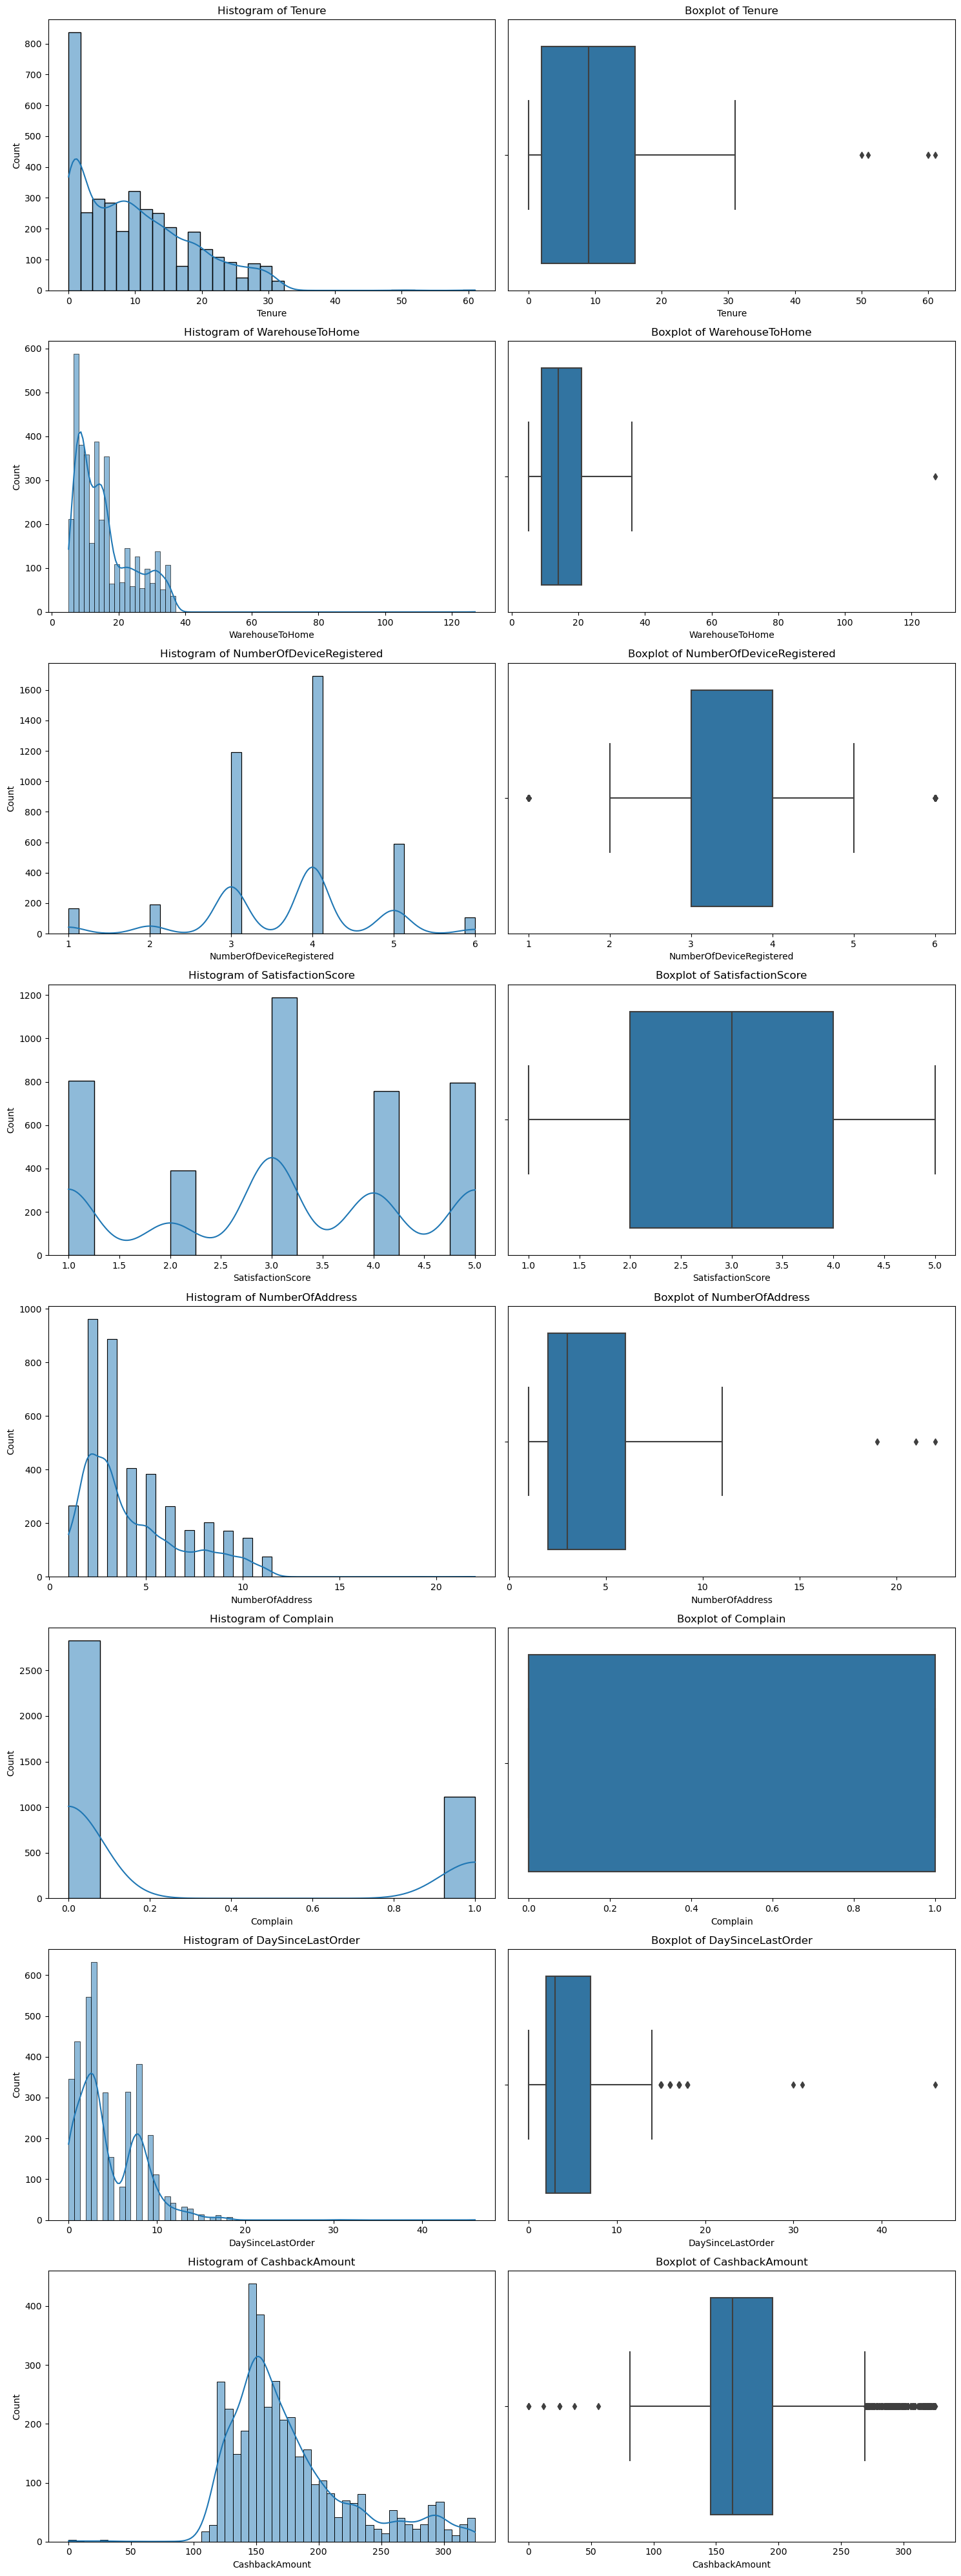

In [14]:
# Get the list of numerical columns
numerical_cols = df.select_dtypes(include=['number']).columns

# Set up the matplotlib figure
plt.figure(figsize=(15, len(numerical_cols) * 5))

# Iterate through each numerical column and create a plot
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(len(numerical_cols), 2, 2*i - 1)  # Histogram
    sns.histplot(df[col].dropna(), kde=True)
    plt.title(f'Histogram of {col}')
    
    plt.subplot(len(numerical_cols), 2, 2*i)  # Boxplot
    sns.boxplot(x=df[col].dropna())
    plt.title(f'Boxplot of {col}')

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

### Missing Value Handling

In [15]:
# Filling missing value with median
median_value_tenure = df['Tenure'].median()
df['Tenure'].fillna(median_value_tenure, inplace=True)

median_value_DaySinceLastOrder = df['DaySinceLastOrder'].median()
df['DaySinceLastOrder'].fillna(median_value_DaySinceLastOrder, inplace=True)

median_value_WarehouseToHome = df['WarehouseToHome'].median()
df['WarehouseToHome'].fillna(median_value_WarehouseToHome, inplace=True)

In [16]:
# Calculate the percentage of null values for each column
null_percentage = df.isnull().mean() * 100

# Sort the null percentages in descending order
null_percentage_sorted = null_percentage.sort_values(ascending=False)

# Display the sorted null percentages
print(null_percentage_sorted)

Tenure                      0.0
WarehouseToHome             0.0
NumberOfDeviceRegistered    0.0
PreferedOrderCat            0.0
SatisfactionScore           0.0
MaritalStatus               0.0
NumberOfAddress             0.0
Complain                    0.0
DaySinceLastOrder           0.0
CashbackAmount              0.0
Churn                       0.0
dtype: float64


### Change Data Type

In [17]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].astype('category')
df['MaritalStatus'] = df['MaritalStatus'].astype('category')

df['Churn'] = df['Churn'].astype('category')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Tenure                    3941 non-null   float64 
 1   WarehouseToHome           3941 non-null   float64 
 2   NumberOfDeviceRegistered  3941 non-null   int64   
 3   PreferedOrderCat          3941 non-null   category
 4   SatisfactionScore         3941 non-null   int64   
 5   MaritalStatus             3941 non-null   category
 6   NumberOfAddress           3941 non-null   int64   
 7   Complain                  3941 non-null   int64   
 8   DaySinceLastOrder         3941 non-null   float64 
 9   CashbackAmount            3941 non-null   float64 
 10  Churn                     3941 non-null   category
dtypes: category(3), float64(4), int64(4)
memory usage: 258.5 KB


## Data Preparation

### Data Correlation

In [19]:
numerical_df = df.select_dtypes(include=['number'])

In [20]:
correlation_matrix = numerical_df.corr()

c:\Users\LEGION\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


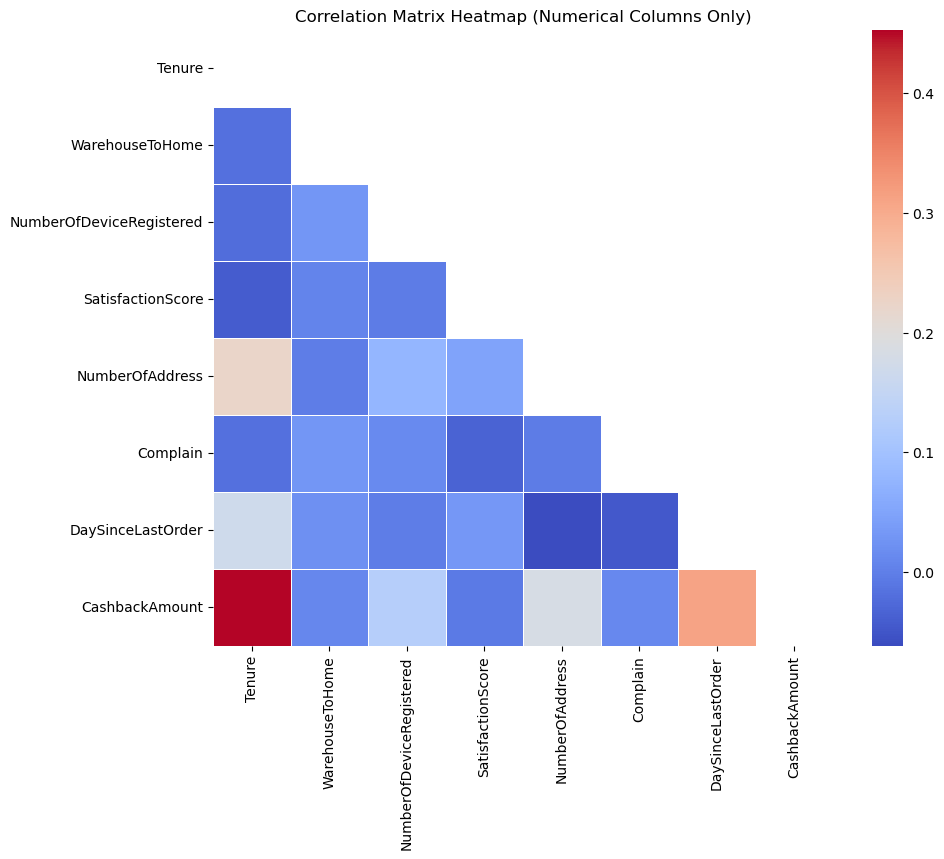

In [21]:
# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with the mask and correlation coefficients
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', 
            linewidths=0.5, fmt='.2f')

# Set the title
plt.title('Correlation Matrix Heatmap (Numerical Columns Only)')

# Show the plot
plt.show()

In [23]:
# Select only numerical columns
numerical_df = df.select_dtypes(include=['number'])

# Calculate the correlation matrix
correlation_matrix = numerical_df.corr()

# Define the correlation threshold
threshold = 0.8

# Identify pairs of columns with correlation coefficients greater than the threshold
high_correlation_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_correlation_pairs.append((correlation_matrix.columns[i], correlation_matrix.columns[j], correlation_matrix.iloc[i, j]))

# Display the pairs of columns with high correlation coefficients
if high_correlation_pairs:
    print("Pairs of columns with correlation coefficient > 0.8:")
    for pair in high_correlation_pairs:
        print(pair)
else:
    print("No pairs of columns with correlation coefficient > 0.8.")

No pairs of columns with correlation coefficient > 0.8.


All column is good (no multicollinearity).

### Encoding

In [24]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,3.0,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [25]:
df.PreferedOrderCat.value_counts()

PreferedOrderCat
Laptop & Accessory    1458
Mobile Phone           887
Fashion                585
Mobile                 559
Grocery                273
Others                 179
Name: count, dtype: int64

In [26]:
df.MaritalStatus.value_counts()

MaritalStatus
Married     2055
Single      1310
Divorced     576
Name: count, dtype: int64

In [51]:
# Select the categorical column(s) you want to one-hot encode
categorical_columns = ['PreferedOrderCat', 'MaritalStatus']

# Perform one-hot encoding
one_hot_encoded_df = pd.get_dummies(df, columns=categorical_columns)

In [28]:
one_hot_encoded_df.columns

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'Churn', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Others', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

In [29]:
df_ready = one_hot_encoded_df.copy()

In [30]:
df_ready.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,15.0,29.0,4,3,2,0,7.0,143.32,0,False,False,True,False,False,False,False,False,True
1,7.0,25.0,4,1,2,0,7.0,129.29,0,False,False,False,True,False,False,False,True,False
2,27.0,13.0,3,1,5,0,7.0,168.54,0,False,False,True,False,False,False,False,True,False
3,20.0,25.0,4,3,7,0,3.0,230.27,0,True,False,False,False,False,False,True,False,False
4,30.0,15.0,4,4,8,0,8.0,322.17,0,False,False,False,False,False,True,False,False,True


*One hot encoding* digunakan karena fitur yang akan di lakukan *encoding* tidak harus memiliki tingkatan kelas tertentu dan antar kelasnya tidak memiliki hubungan. Selain itu, jumlah kelas pada fitur juga tidak terlalu banyak sehingga tidak perlu menggunakan *binary encoding*.

### Target Imbalance

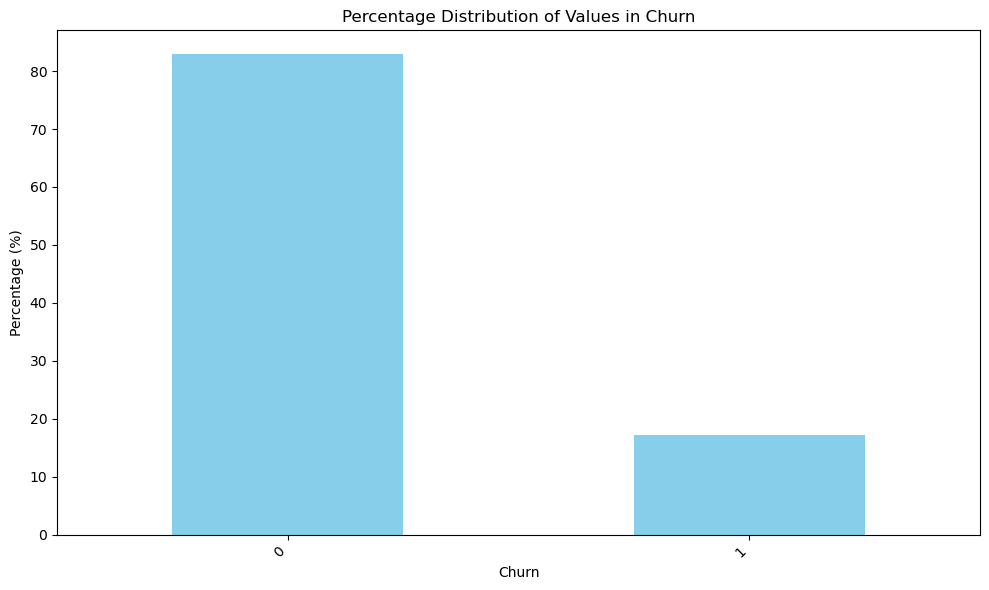

In [31]:
# Select the column for which you want to check the percentage distribution
column_name = 'Churn'

# Calculate the percentage distribution of values in the column
percentage_distribution = df[column_name].value_counts(normalize=True) * 100

# Sort the values by index (value) for better visualization
percentage_distribution = percentage_distribution.sort_index()

# Create a bar plot
plt.figure(figsize=(10, 6))
percentage_distribution.plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of Values in ' + column_name)
plt.xlabel(column_name)
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [32]:
# Separate features (X) and target variable (y)
X = df_ready.drop('Churn', axis=1)  # Adjust 'target_column' with your target variable
y = df_ready['Churn']

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

# Display the class distribution before and after applying SMOTE
print("Before SMOTE:")
print(y.value_counts())
print("\nAfter SMOTE:")
print(pd.Series(y_resampled).value_counts())

Before SMOTE:
Churn
0    3267
1     674
Name: count, dtype: int64

After SMOTE:
Churn
0    3267
1    3267
Name: count, dtype: int64


In [33]:
X_resampled.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,15.0,29.0,4,3,2,0,7.0,143.32,False,False,True,False,False,False,False,False,True
1,7.0,25.0,4,1,2,0,7.0,129.29,False,False,False,True,False,False,False,True,False
2,27.0,13.0,3,1,5,0,7.0,168.54,False,False,True,False,False,False,False,True,False
3,20.0,25.0,4,3,7,0,3.0,230.27,True,False,False,False,False,False,True,False,False
4,30.0,15.0,4,4,8,0,8.0,322.17,False,False,False,False,False,True,False,False,True


## Modelling

In [52]:
# Model Selection
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

### Spliting

In [36]:
X_resampled

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,15.000000,29.000000,4,3,2,0,7.000000,143.320000,False,False,True,False,False,False,False,False,True
1,7.000000,25.000000,4,1,2,0,7.000000,129.290000,False,False,False,True,False,False,False,True,False
2,27.000000,13.000000,3,1,5,0,7.000000,168.540000,False,False,True,False,False,False,False,True,False
3,20.000000,25.000000,4,3,7,0,3.000000,230.270000,True,False,False,False,False,False,True,False,False
4,30.000000,15.000000,4,4,8,0,8.000000,322.170000,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6529,0.446888,34.340664,3,1,2,0,9.000000,173.570137,True,False,True,False,False,False,False,True,True
6530,0.000000,30.000000,4,5,2,0,9.000000,187.220000,True,False,False,False,False,False,False,False,True
6531,1.000000,7.000000,5,4,3,1,2.231915,147.296862,False,False,False,False,True,False,True,False,True
6532,0.000000,14.000000,3,2,4,1,5.001196,124.219833,False,False,False,True,False,False,True,False,True


In [37]:
# Convert boolean columns to integers (0 and 1) if there are any
bool_cols = X_resampled.select_dtypes(include=['bool']).columns
X_resampled[bool_cols] = X_resampled[bool_cols].astype(int)

In [38]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

### Scaling **(Min-Max Scalling)**

In [39]:
scaler_minmax = MinMaxScaler()
X_train_minmax = scaler_minmax.fit_transform(X_train)
X_test_minmax = scaler_minmax.transform(X_test)

Min-max scaler dipilih karena data nya tidak terdistribusi normal (*left skew*).

In [40]:
# List of models to evaluate
models = [
    ('Logistic Regression', LogisticRegression(max_iter=200)),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Support Vector Machine', SVC(probability=True)),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('Naive Bayes', GaussianNB()),
    ('Gradient Boosting', GradientBoostingClassifier())
]

# Initialize a list to store results
results = []

# Train and evaluate each model
for name, model in models:
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    
    # Predict and calculate accuracy
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    # Calculate execution time
    execution_time = end_time - start_time
    
    # Append results to list
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Time (seconds)': execution_time
    })

# Convert results list to DataFrame
results_df = pd.DataFrame(results)

# Display results
print(results_df)

c:\Users\LEGION\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                    Model  Accuracy  Time (seconds)
0     Logistic Regression  0.856159        0.103136
1           Decision Tree  0.937261        0.013520
2           Random Forest  0.970926        0.431221
3  Support Vector Machine  0.766641        3.233596
4     K-Nearest Neighbors  0.884468        0.003997
5             Naive Bayes  0.730681        0.005002
6       Gradient Boosting  0.913542        0.591652


Di pilih model menggunakan algoritma *Random Forest*, karena model yang dihasilkan memiliki akurasi yang paling tinggi dan waktu yang dipakai untuk menjalankan modelnya relatif tidak terlalu lama dibandingkan dengan metode lainnya.

### Final Model

In [41]:
# Model Selection and Training: Random Forest Classifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9701606732976281
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97       689
           1       0.96      0.98      0.97       618

    accuracy                           0.97      1307
   macro avg       0.97      0.97      0.97      1307
weighted avg       0.97      0.97      0.97      1307



In [42]:
# Extracting feature importance
feature_importance = pd.DataFrame(model.feature_importances_, index=X_resampled.columns, columns=['Importance'])
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importance)

Feature Importance:
                                     Importance
Tenure                                 0.276325
CashbackAmount                         0.128301
MaritalStatus_Single                   0.093968
DaySinceLastOrder                      0.092896
WarehouseToHome                        0.084868
NumberOfAddress                        0.055301
MaritalStatus_Married                  0.051113
SatisfactionScore                      0.046610
NumberOfDeviceRegistered               0.031056
Complain                               0.029920
MaritalStatus_Divorced                 0.027052
PreferedOrderCat_Mobile Phone          0.023358
PreferedOrderCat_Fashion               0.020661
PreferedOrderCat_Laptop & Accessory    0.019631
PreferedOrderCat_Mobile                0.012351
PreferedOrderCat_Grocery               0.003905
PreferedOrderCat_Others                0.002683


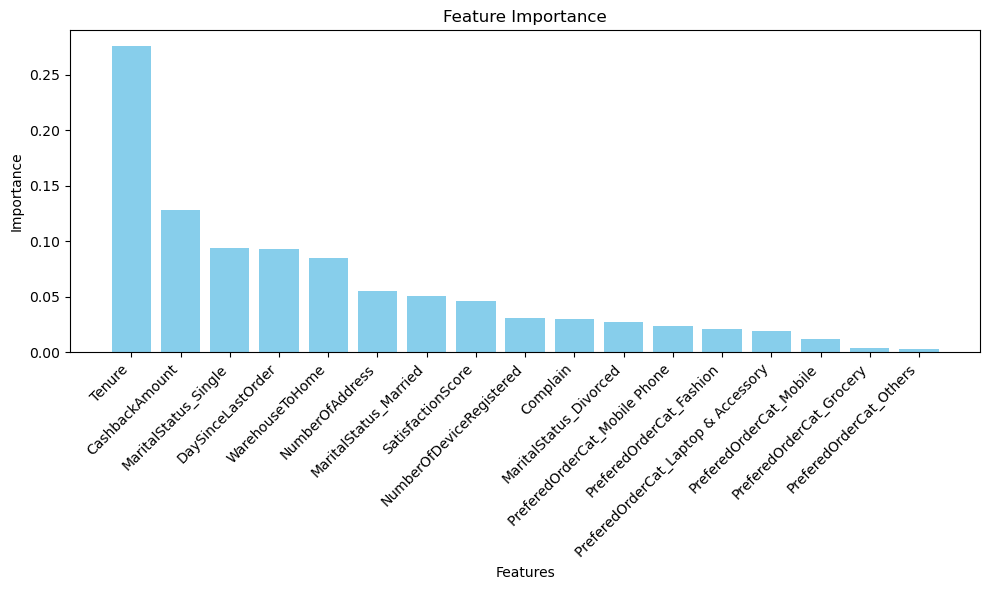

In [43]:
import matplotlib.pyplot as plt

# Visualizing feature importance
plt.figure(figsize=(10, 6))
plt.bar(feature_importance.index, feature_importance['Importance'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Berdasarkan hasil visualisasi *feature importance*, diperoleh 3 fitur yang paling berpengaruh terhadap *churn*, yakni *Tenure, CashbackAmount*, dan *MaritalStatues - Single*.

In [44]:
import pickle

# Save the trained model to a pickle file
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(model, file)

print(f"Model saved to {model_filename}")

Model saved to random_forest_model.pkl


Please note to do all data processing first before use the model

## Use Model

In [56]:
# Load the trained model from the pickle file
model_filename = 'random_forest_model.pkl'
with open(model_filename, 'rb') as file:
    model_pakek = pickle.load(file)

Model loaded successfully.
